In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-product-reviews-dataset/7817_1.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Read the data

df=pd.read_csv("/kaggle/input/amazon-product-reviews-dataset/7817_1.csv")

In [4]:
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [5]:
# Exploring the data - example review
df["reviews.text"].values[2]

"I am enjoying it so far. Great for reading. Had the original Fire since 2012. The Fire used to make my eyes hurt if I read too long. Haven't experienced that with the Paperwhite yet."

In [6]:
df.shape

(1597, 27)

In [7]:
# Downsizing the data
df.shape

(1597, 27)

In [8]:
df.head

<bound method NDFrame.head of                         id       asins   brand  \
0     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
1     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
2     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
3     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
4     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
...                    ...         ...     ...   
1592  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   
1593  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   
1594  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   
1595  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   
1596  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   

                                             categories colors  \
0                            Amazon Devices,mazon.co.uk    NaN   
1                            Amazon Devices,mazon.co.uk    NaN   
2                            Amazon Devices,mazon.co.uk    NaN   
3                            Amazon Devices,mazon.co.uk    NaN   
4                            Amazon Dev

In [9]:
# Quick EDA
df['reviews.rating'].value_counts()

5.0    741
4.0    236
3.0    124
1.0     42
2.0     34
Name: reviews.rating, dtype: int64

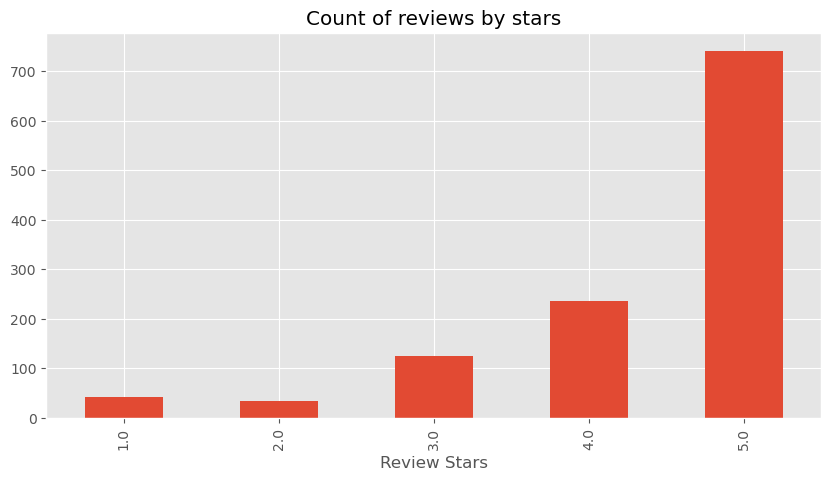

In [10]:
# We can observe that 5.0 has the highest rating. Lets create a hist for better visualisation
ax= df['reviews.rating'].value_counts().sort_index()\
    .plot(kind='bar', 
    title='Count of reviews by stars',figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

In [11]:
# Basic NLTK
example= df['reviews.text'][166]
print(example)

Like a previous reviewer mentioned it is fabric over hard plastic it is not a snug or tight fit. Good quality though.


In [12]:
tokens= nltk.word_tokenize(example)
tokens[:19]

['Like',
 'a',
 'previous',
 'reviewer',
 'mentioned',
 'it',
 'is',
 'fabric',
 'over',
 'hard',
 'plastic',
 'it',
 'is',
 'not',
 'a',
 'snug',
 'or',
 'tight',
 'fit']

In [13]:
# Parts of speech tagging
tagged=nltk.pos_tag(tokens)
tagged[:19]

[('Like', 'IN'),
 ('a', 'DT'),
 ('previous', 'JJ'),
 ('reviewer', 'NN'),
 ('mentioned', 'VBD'),
 ('it', 'PRP'),
 ('is', 'VBZ'),
 ('fabric', 'JJ'),
 ('over', 'IN'),
 ('hard', 'JJ'),
 ('plastic', 'NN'),
 ('it', 'PRP'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('a', 'DT'),
 ('snug', 'NN'),
 ('or', 'CC'),
 ('tight', 'JJ'),
 ('fit', 'NN')]

In [14]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Like/IN
  a/DT
  previous/JJ
  reviewer/NN
  mentioned/VBD
  it/PRP
  is/VBZ
  fabric/JJ
  over/IN
  hard/JJ
  plastic/NN
  it/PRP
  is/VBZ
  not/RB
  a/DT
  snug/NN
  or/CC
  tight/JJ
  fit/NN
  ./.
  Good/JJ
  quality/NN
  though/IN
  ./.)


In [15]:
# VADER Sentiment Scoring
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia= SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [16]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [17]:
sia.polarity_scores('This is the worst experience ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [18]:
# Lets check the polarity score on the example
sia.polarity_scores(example)

{'neg': 0.055, 'neu': 0.632, 'pos': 0.312, 'compound': 0.7579}

In [19]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text=row['reviews.text']
    myid=row['id']
    res[myid]= sia.polarity_scores(text)
    

  0%|          | 0/1597 [00:00<?, ?it/s]

In [20]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'id'})
vaders= vaders.merge(df, how='left')

In [21]:
# Now we hae sentiment score and metadata
vaders.head()

,id,neg,neu,pos,compound,asins,brand,categories,colors,dateAdded,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,0.0,0.773,0.227,0.8908,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,0.0,0.773,0.227,0.8908,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,0.0,0.773,0.227,0.8908,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,0.0,0.773,0.227,0.8908,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,0.0,0.773,0.227,0.8908,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


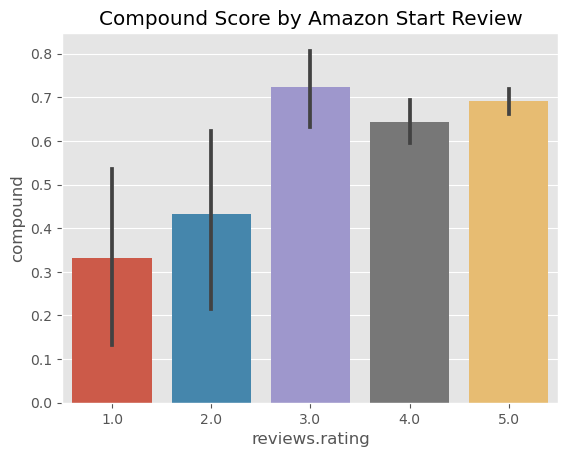

In [22]:
# Plot vaders results
ax= sns.barplot(data=vaders, x= 'reviews.rating', y='compound')
ax.set_title('Compound Score by Amazon Start Review')
plt.show()

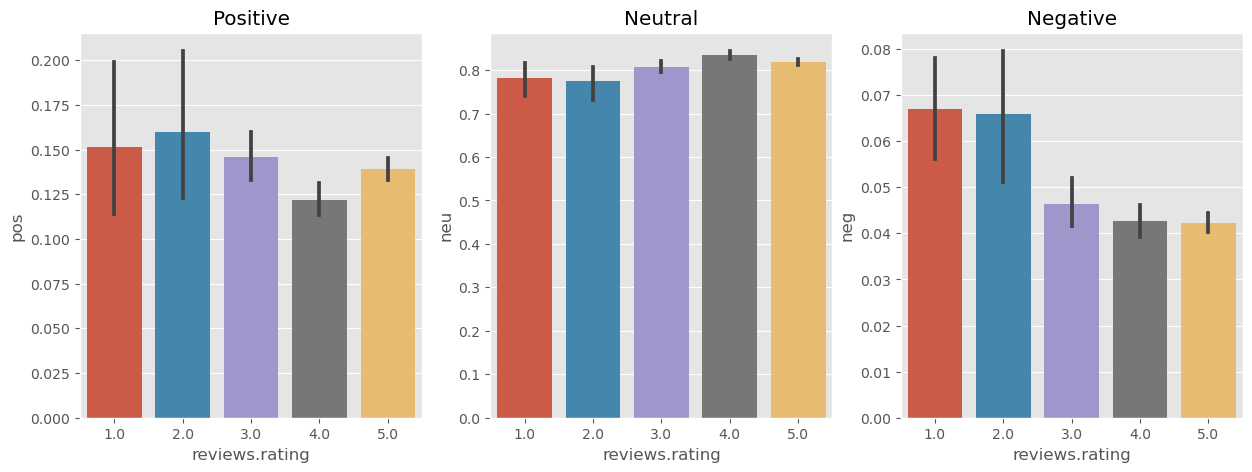

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(data=vaders, x='reviews.rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='reviews.rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='reviews.rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

In [24]:
# Roberta Pretrained Model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [25]:
#MODEL= f"cardiffnlp/twitter-roberta-base-sentiment"
#tokeizer= AutoTokenizer.from_pretrained(MODEL)
#model= AutoModelForSequenceCLassification.from_pretrained(MODEL)
!pip install transformers
!pip cache purge

Files removed: 7


In [26]:
!pip cache purge

Files removed: 0
